In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import json
import glob, os

In [3]:
data = []
for file in glob.glob("raw_github/teammates/*.json"):
    print("Find data {}".format(file))
    with open(file) as json_file:
        d = json.load(json_file)
        data.extend(d)

Find data raw_github/teammates/data.json


In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(data)

In [6]:
len(df)

22984

In [7]:
clean_df = df[df['in_reply_to_id'].isnull()]
clean_df = clean_df[clean_df['path'].str.endswith('.java')]

In [8]:
len(clean_df)

10201

In [9]:
clean_df.head()

url  pull_request_review_id  \
0  https://api.github.com/repos/TEAMMATES/teammat...                     NaN   
1  https://api.github.com/repos/TEAMMATES/teammat...                     NaN   
2  https://api.github.com/repos/TEAMMATES/teammat...                     NaN   
3  https://api.github.com/repos/TEAMMATES/teammat...                     NaN   
4  https://api.github.com/repos/TEAMMATES/teammat...                     NaN   

         id                                           node_id  \
0  22157309  MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDIyMTU3MzA5   
1  22157513  MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDIyMTU3NTEz   
2  22336277  MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDIyMzM2Mjc3   
3  22336330  MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDIyMzM2MzMw   
4  22336353  MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDIyMzM2MzUz   

                                           diff_hunk  \
0  @@ -534,8 +534,6 @@ public String getValidityI...   
1  @@ -72,8 +72,7 @@ public void testGetValidityI...   
2  @@ -256,7 +256,7 @@ public void testGetValidit...   
3  @@ -50,8 +50,18 @@ private StudentProfileAttri...   
4  @@ -50,8 +50,18 @@ private StudentProfileAttri...   

                                                path  position  \
0  src/main/java/teammates/common/util/FieldValid...       NaN   
1  src/test/java/teammates/test/cases/common/Fiel...       NaN   
2  src/test/java/teammates/test/cases/common/Fiel...       NaN   
3  src/main/java/teammates/ui/controller/StudentP...       NaN   
4  src/main/java/teammates/ui/controller/StudentP...       NaN   

   original_position                                 commit_id  \
0                  5  5399269eca3b0188c2cfc09b6577c0c2d2715180   
1                  6  5399269eca3b0188c2cfc09b6577c0c2d2715180   
2                 26  5399269eca3b0188c2cfc09b6577c0c2d2715180   
3                  6  5399269eca3b0188c2cfc09b6577c0c2d2715180   
4                 19  5399269eca3b0188c2cfc09b6577c0c2d2715180   

                         original_commit_id  \
0  bb361edc82499a427736070608739c06f4803214   
1  bb361edc82499a427736070608739c06f4803214   
2  f7336e2be5b8f42aafe5a39af4ded690a18522e4   
3  f7336e2be5b8f42aafe5a39af4ded690a18522e4   
4  f7336e2be5b8f42aafe5a39af4ded690a18522e4   

                                                user  \
0  {'login': 'damithc', 'id': 1673303, 'node_id':...   
1  {'login': 'damithc', 'id': 1673303, 'node_id':...   
2  {'login': 'damithc', 'id': 1673303, 'node_id':...   
3  {'login': 'damithc', 'id': 1673303, 'node_id':...   
4  {'login': 'damithc', 'id': 1673303, 'node_id':...   

                                                body            created_at  \
0  I don't think we should relax validation check...  2014-12-22T08:14:18Z   
1  If you revert to the original FieldValidator, ...  2014-12-22T08:23:22Z   
2  Why these three changes? They don't seem to be...  2014-12-30T01:37:48Z   
3            trimming should be before validating?\n  2014-12-30T01:40:20Z   
4  tweak the relevant UI test (success case) to s...  2014-12-30T01:41:21Z   

             updated_at                                           html_url  \
0  2015-01-02T07:59:32Z  https://github.com/TEAMMATES/teammates/pull/27...   
1  2015-01-02T07:59:32Z  https://github.com/TEAMMATES/teammates/pull/27...   
2  2015-01-02T07:59:32Z  https://github.com/TEAMMATES/teammates/pull/27...   
3  2015-01-02T07:59:32Z  https://github.com/TEAMMATES/teammates/pull/27...   
4  2015-01-02T07:59:32Z  https://github.com/TEAMMATES/teammates/pull/27...   

                                    pull_request_url author_association  \
0  https://api.github.com/repos/TEAMMATES/teammat...             MEMBER   
1  https://api.github.com/repos/TEAMMATES/teammat...             MEMBER   
2  https://api.github.com/repos/TEAMMATES/teammat...             MEMBER   
3  https://api.github.com/repos/TEAMMATES/teammat...             MEMBER   
4  https://api.github.com/repos/TEAMMATES/teammat...             MEMBER   

                                     

In [10]:
from sklearn.model_selection import train_test_split

clean_df = clean_df.reset_index()
Xy = clean_df[['diff_hunk', 'body']]

In [11]:
tmp_Xy, test_Xy = train_test_split(Xy, test_size=0.12, random_state=42)
train_Xy, val_Xy = train_test_split(tmp_Xy, test_size=0.15, random_state=42)

In [12]:
train_Xy.to_csv('data_elasticsearch/train_Xy.csv', header=True, index=False)
val_Xy.to_csv('data_elasticsearch/val_Xy.csv', header=True, index=False)
test_Xy.to_csv('data_elasticsearch/test_Xy.csv', header=True, index=False)

In [13]:
train_Xy.iloc[0]

diff_hunk    @@ -28,7 +28,8 @@\n     static{\n         map(...
body         See if it can be defined in one place and used...
Name: 1386, dtype: object

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
diff_hunk_lens = Xy['diff_hunk'].map(len)

print(diff_hunk_lens.describe())

count    10201.000000
mean      1665.146358
std       3139.210596
min         17.000000
25%        387.000000
50%        697.000000
75%       1614.000000
max      65535.000000
Name: diff_hunk, dtype: float64


Text(0.5, 0, 'length of diff_hunk')

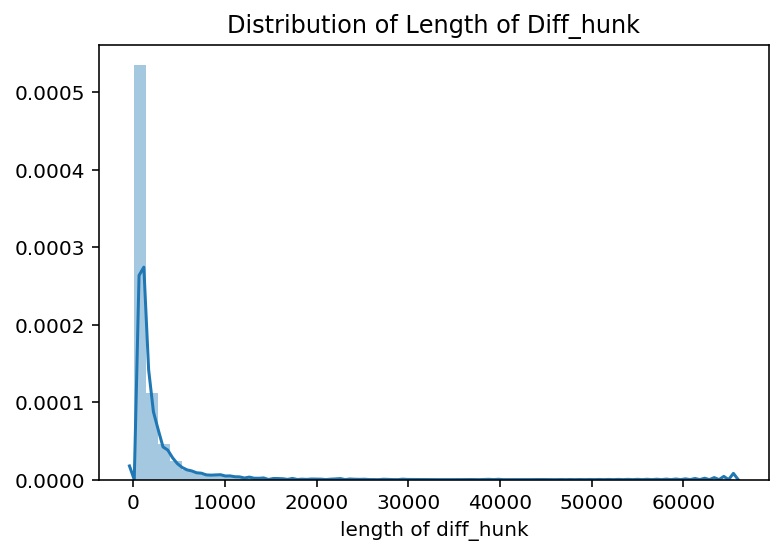

In [15]:
sns.distplot(diff_hunk_lens)
plt.title("Distribution of Length of Diff_hunk")
plt.xlabel("length of diff_hunk")


In [16]:
idx = np.argmin(diff_hunk_lens.values)
print(Xy['diff_hunk'].iloc[idx])

@@ -1,3 +1,4 @@
+


In [17]:
body_lens = Xy['body'].map(len)
print(body_lens.describe())

count    10201.000000
mean       120.813352
std        144.933863
min          1.000000
25%         40.000000
50%         82.000000
75%        151.000000
max       3075.000000
Name: body, dtype: float64


Text(0.5, 0, 'length of body')

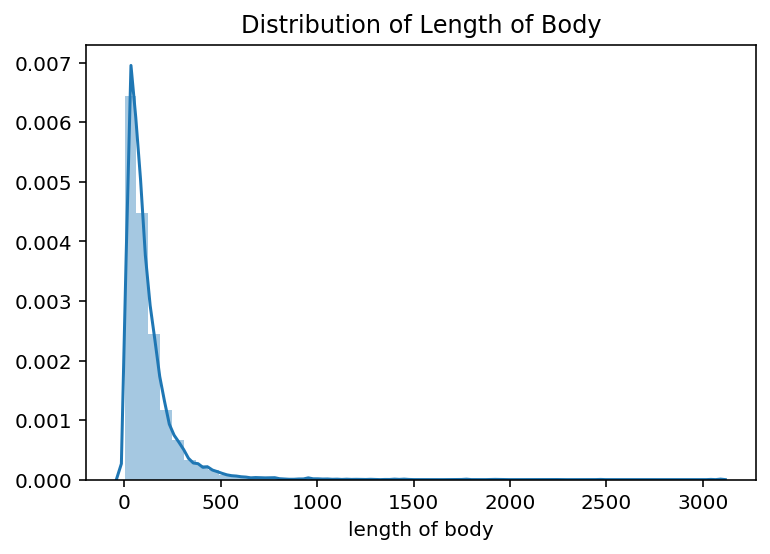

In [18]:
sns.distplot(body_lens)
plt.title("Distribution of Length of Body")
plt.xlabel("length of body")

In [19]:
import numpy as np
idx = np.argmin(body_lens.values)
Xy['body'].iloc[idx]

'?'

In [20]:
len(train_Xy)

7629

In [21]:
len(val_Xy)

1347

In [22]:
len(test_Xy)

1225

### More Data

In [23]:
sample = clean_df.iloc[0, :]
print(sample)

index                                                                     0
url                       https://api.github.com/repos/TEAMMATES/teammat...
pull_request_review_id                                                  NaN
id                                                                 22157309
node_id                    MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDIyMTU3MzA5
diff_hunk                 @@ -534,8 +534,6 @@ public String getValidityI...
path                      src/main/java/teammates/common/util/FieldValid...
position                                                                NaN
original_position                                                         5
commit_id                          5399269eca3b0188c2cfc09b6577c0c2d2715180
original_commit_id                 bb361edc82499a427736070608739c06f4803214
user                      {'login': 'damithc', 'id': 1673303, 'node_id':...
body                      I don't think we should relax validation check...
created_at  

In [24]:
url = sample['pull_request_url'].replace("api.github.com/repos", "github.com").replace("pulls", "pull")
print(url)
diff_hunk = sample['diff_hunk']
print(diff_hunk)
# https://github.com/elastic/elasticsearch/pull/23997
path = sample['path']
print(path)

https://github.com/TEAMMATES/teammates/pull/2786
@@ -534,8 +534,6 @@ public String getValidityInfoForSizeCappedAlphanumericNonEmptyString(String fiel
         
         if (value.isEmpty()) {
             return String.format(SIZE_CAPPED_NON_EMPTY_STRING_ERROR_MESSAGE, value, fieldName, REASON_EMPTY, fieldName, maxLength);
-        } else if (!isTrimmed(value)) {
-            return String.format(WHITESPACE_ONLY_OR_EXTRA_WHITESPACE_ERROR_MESSAGE, fieldName);
src/main/java/teammates/common/util/FieldValidator.java


In [25]:
import urllib.request

fp = urllib.request.urlopen(url + ".diff")
mybytes = fp.read()

full_diff = mybytes.decode("utf8")
fp.close()

print(full_diff)

diff --git a/src/main/java/teammates/common/util/StringHelper.java b/src/main/java/teammates/common/util/StringHelper.java
index b0d138c1fbc..c4857b95d54 100644
--- a/src/main/java/teammates/common/util/StringHelper.java
+++ b/src/main/java/teammates/common/util/StringHelper.java
@@ -448,4 +448,13 @@ public static String integerToLowerCaseAlphabeticalIndex(int n) {
         return result;
     }
     
+    /**
+     * Trim the given string if it is not equals to null
+     */
+    public static String trimIfNotNull(String untrimmedString){
+        if(untrimmedString != null){
+            return untrimmedString.trim();
+        }
+        return untrimmedString;
+    }
 }
diff --git a/src/main/java/teammates/ui/controller/StudentProfileEditSaveAction.java b/src/main/java/teammates/ui/controller/StudentProfileEditSaveAction.java
index e2669886c95..29676b7b02f 100644
--- a/src/main/java/teammates/ui/controller/StudentProfileEditSaveAction.java
+++ b/src/main/java/teammates/ui/controller